### Skript to Visualize 
package mathplotlip 

In [ ]:
import matplotlib.pyplot as plt
import common_paths
import pandas as pd
import numpy as np

In [ ]:
#area.to_csv(common_paths.DATA.joinpath("dwd/area_Brandenburg.csv"))
df_number = pd.read_csv(common_paths.DATA.joinpath("dwd/nr_Brandenburg.csv"))
df_area   = pd.read_csv(common_paths.DATA.joinpath("dwd/area_Brandenburg.csv"))
df_predict_numbers = pd.read_csv(common_paths.DATA.joinpath("dwd/final_predictions.csv"))

In [10]:
df_predict_numbers
#gorupby('Year','Month)

# Was braucht Monat Jahr Bundesland Prediction Value 

,Unnamed: 0,Year,Month,tasmax,sfcWind,pr,nr_predictions
0,0,2024,1,277.818281,4.376295,51.553847,0.164291
1,1,2024,2,275.542922,3.763572,13.482759,2.459327
2,2,2024,3,282.054063,4.178627,21.255087,0.651208
3,3,2024,4,290.934900,3.595162,20.208205,24.029319
4,4,2024,5,294.976148,2.951547,47.807941,7.718772
...,...,...,...,...,...,...,...
356,356,2053,9,295.810764,2.768496,16.893846,62.192160
357,357,2053,10,285.987099,3.775451,48.880397,0.903613
358,358,2053,11,278.810097,3.910427,76.919488,0.123145
359,359,2053,12,272.485429,3.304169,27.871464,0.085704


In [ ]:

#uniqu = np.unique(df_number['nFires'].values)
df_number.info()
df_area.info()
#drop 
# TODO Dataset bearbeiten nur noch wenn ich auf die features hinauswill 

In [ ]:
#Ideen Viz für predictions 
# Eine Map für ein Monat 
#Plot und Scatter unterschiede 

In [ ]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the Axes.
plt.show()                           # Show the figure.

In [ ]:
fig = plt.figure()             # an empty figure with no Axes
fig, ax = plt.subplots()       # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
# a figure with one Axes on the left, and two on the right:
fig, axs = plt.subplot_mosaic([['left', 'right_top'],
                               ['left', 'right_bottom']])

Text(0, 0.5, 'number of fires')

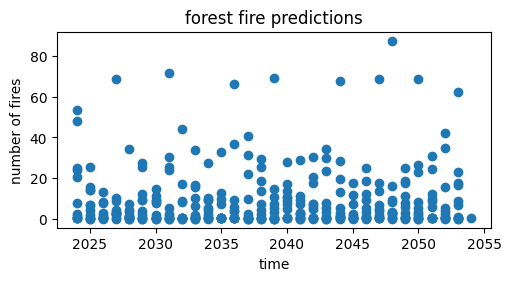

In [14]:

#data = {'time': df_area['month'],
#        'nFires': df_predict_numbers['nFires'],
 #       'area': df_area['area']}


##data['b'] = data['a'] + 10 * np.random.randn(50)
#data['d'] = np.abs(data['d']) * 100

#data['Year']
#data['nFires']

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.scatter('Year, Month', 'nr_predictions', data = df_predict_numbers)
ax.set_title('forest fire predictions')
ax.set_xlabel('time')
ax.set_ylabel('number of fires')